<a href="https://colab.research.google.com/github/enidroman/Enid-Roman-Python-201-Capstone-Project-/blob/main/Enid_Roman_Python_201_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

! pip install --upgrade pip
! pip uninstall pandas-profiling
! pip install pandas-profiling

     |████████████████████████████████| 1.6 MB 25.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (Y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
     |████████████████████████████████| 248 kB 33.6 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 62 kB 840 kB/s 
     |████████████████████████████████| 102 kB 75.5 MB/s 
     |████████████████████████████████| 675 kB 79.5 MB/s 
     |████████████████████████████████| 3.1 MB 30.7 MB/s 
     |████████████████████████████████| 10.1 MB 72.8 MB/s 
     |████████████████████████████████| 636 kB 62.5 MB/s 
     |████████████████████

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
%matplotlib inline

In [3]:
import pandas_profiling as pp

# **2014 - 2015 to 2016 -2017 NYC Regents Report**





I did an observation of how many rows and columns this particular dataset contains with dataframe.shape. This dataset has 212331 rows and 19 columns.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

df.shape


(212331, 15)

(Please note in order to see the ProfileReport you must run the installation again and click y on the box. Since this was installed in Colab and not part of the Pandas package, this is the only way it will run) 

I did a Profile Report to get a complete information on the data set. 

This report gave me a exploratory data analysis with just a few lines of codes.

I was able to use this report for my data cleaning and analysis.

In [5]:
profile = pp.ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

I observed the missing values "s" and "na" in the dataset. I then replaced the missing values with NaN to make it easier to replace all the missing value into numbers so I wouldn't have problem with my analysis and graphings.


In [6]:
missing_values =["s", "na"]

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
                na_values=missing_values)
df.head(100)

School DBN  ... Percent Scoring CR
0      01M034  ...                NaN
1      01M034  ...                NaN
2      01M034  ...                NaN
3      01M140  ...                NaN
4      01M140  ...                NaN
..        ...  ...                ...
95     01M448  ...                NaN
96     01M450  ...               77.8
97     01M450  ...               83.3
98     01M450  ...               83.0
99     01M450  ...               72.5

[100 rows x 15 columns]

I did a df.columns to see the columns names. 

In [8]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

I dropped the Percent Scoring Below 65, Percent Scoring 65 or Above, Percent Scoring 80 or Above and the last 2 columns, "Number scoring CR' and "Percent Scoring CR". 



Had to many information missing and didn't think it was necessary for my analysis.

In [9]:
drop_cols=['Percent Scoring Below 65', 'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above','Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)
df.head()

School DBN  ... Number Scoring 80 or Above
0     01M034  ...                        NaN
1     01M034  ...                        7.0
2     01M034  ...                        2.0
3     01M140  ...                        NaN
4     01M140  ...                        NaN

[5 rows x 10 columns]

I did a df.dropna() to remove all unnecessary rows that had "NaN" because it had missing info. 

In [10]:
df = df.dropna()
df = df.reset_index(drop=True)

In [11]:
df.head(1000)

School DBN  ... Number Scoring 80 or Above
0       01M034  ...                        7.0
1       01M034  ...                        2.0
2       01M140  ...                        0.0
3       01M140  ...                        5.0
4       01M140  ...                        1.0
..         ...  ...                        ...
995     02M416  ...                      101.0
996     02M416  ...                      129.0
997     02M416  ...                      127.0
998     02M416  ...                      112.0
999     02M416  ...                      103.0

[1000 rows x 10 columns]

I did a df.info() that gives me the total columns and rows the data has, and data type.

I observed that the number of rows had dropped to 137101 and the number of columns dropped to 10 after I did the data cleaning. 

I also observed 4 columns that had numbers that were data type float64 and 3 of the columns had decimal and 0's.

I proceeded to change the data type float64 into intengers to get rid of the decimals and 0's. 

I then did a df.info again to make sure the 4 columns were changed to float64.




In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137101 entries, 0 to 137100
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   School DBN                  137101 non-null  object 
 1   School Name                 137101 non-null  object 
 2   School Level                137101 non-null  object 
 3   Regents Exam                137101 non-null  object 
 4   Year                        137101 non-null  int64  
 5   Total Tested                137101 non-null  int64  
 6   Mean Score                  137101 non-null  float64
 7   Number Scoring Below 65     137101 non-null  float64
 8   Number Scoring 65 or Above  137101 non-null  float64
 9   Number Scoring 80 or Above  137101 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 10.5+ MB


In [13]:
m=(df.dtypes=='float')
df.loc[:,m]=df.loc[:,m].astype(int)
df.head()

School DBN  ... Number Scoring 80 or Above
0     01M034  ...                          7
1     01M034  ...                          2
2     01M140  ...                          0
3     01M140  ...                          5
4     01M140  ...                          1

[5 rows x 10 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137101 entries, 0 to 137100
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   School DBN                  137101 non-null  object
 1   School Name                 137101 non-null  object
 2   School Level                137101 non-null  object
 3   Regents Exam                137101 non-null  object
 4   Year                        137101 non-null  int64 
 5   Total Tested                137101 non-null  int64 
 6   Mean Score                  137101 non-null  int64 
 7   Number Scoring Below 65     137101 non-null  int64 
 8   Number Scoring 65 or Above  137101 non-null  int64 
 9   Number Scoring 80 or Above  137101 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 10.5+ MB


I noticed that the Number Scoring 65 or Above also included the Number Scoring 80 or Above so I subtracted the Number Scoring 80 or Above from Total Tested and created a new column called Number Scoring 65 to 79. 

I then proceed to drop column Number Scoring 65 or Above.

I then rearranged the columns into their proper order. 

In [15]:
df['Number Scoring 65 to 79'] = df['Total Tested'] - df['Number Scoring 80 or Above']

df.head()


School DBN  ... Number Scoring 65 to 79
0     01M034  ...                       9
1     01M034  ...                       7
2     01M140  ...                       9
3     01M140  ...                      10
4     01M140  ...                       8

[5 rows x 11 columns]

In [16]:
drop_cols=['Number Scoring 65 or Above']
df.drop(drop_cols, inplace = True, axis=1)

df.head()

School DBN  ... Number Scoring 65 to 79
0     01M034  ...                       9
1     01M034  ...                       7
2     01M140  ...                       9
3     01M140  ...                      10
4     01M140  ...                       8

[5 rows x 10 columns]

In [17]:
df=df[['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year', 'Total Tested', 'Mean Score', 'Number Scoring Below 65', 'Number Scoring 65 to 79', 'Number Scoring 80 or Above']]
df.head(10)

School DBN  ... Number Scoring 80 or Above
0     01M034  ...                          7
1     01M034  ...                          2
2     01M140  ...                          0
3     01M140  ...                          5
4     01M140  ...                          1
5     01M184  ...                         23
6     01M184  ...                         33
7     01M184  ...                         44
8     01M184  ...                         43
9     01M188  ...                          0

[10 rows x 10 columns]

I did a df.describe() function to compute a summary of satistics pertaining to the DataFrame columns. 

I also did a df.describe() of the Average Score for each Regents Exam per year.

This function gives the mean, std and IQR values. 

I also set it at 2 decimal place.


In [18]:
pd.set_option('precision', 2)

df.describe()

Year  ...  Number Scoring 80 or Above
count  137101.00  ...                   137101.00
mean     2015.96  ...                       20.51
std         0.81  ...                       56.30
min      2015.00  ...                        0.00
25%      2015.00  ...                        1.00
50%      2016.00  ...                        5.00
75%      2017.00  ...                       18.00
max      2017.00  ...                     1365.00

[8 rows x 6 columns]

In this analysis you see the break down of the average score of each regents per year and their statistics. 

In [19]:
pd.set_option('precision', 2)
df.groupby(['Year', 'Regents Exam'])['Mean Score'].describe()

count   mean    std  ...   50%   75%   max
Year Regents Exam                                           ...                  
2015 Algebra2/Trigonometry            2392.0  56.83  13.85  ...  56.0  66.0  94.0
     Common Core Algebra              5870.0  62.71   8.74  ...  62.0  69.0  90.0
     Common Core English              2902.0  69.75  12.37  ...  71.0  78.0  98.0
     Common Core Geometry             2723.0  58.54  10.11  ...  57.0  65.0  92.0
     English                          4637.0  68.27   9.37  ...  68.0  74.0  95.0
     Geometry                         3320.0  63.13  10.80  ...  63.0  71.0  95.0
     Global History and Geography     4821.0  63.79  10.61  ...  63.0  70.0  96.0
     Integrated Algebra               4222.0  64.61   7.01  ...  64.0  68.0  95.0
     Living Environment               5877.0  68.79  10.23  ...  67.0  76.0  96.0
     Physical Settings/Chemistry      2102.0  63.67   9.47  ...  63.0  70.0  89.0
     Physical Settings/Earth Science  3348.0  63.78  11.15  ...  63.0  71.0  95.0
     Physical Settings/Physics         979.0  66.51  12.67  ...  67.0  75.0  94.0
     U.S. History and Government      4730.0  71.64  10.79  ...  71.0  79.0  98.0
2016 Algebra2/Trigonometry            2416.0  55.94  13.17  ...  55.0  64.0  95.0
     Common Core Algebra              6611.0  68.23   9.76  ...  67.0  75.0  94.0
     Common Core Algebra2             1932.0  61.92   9.11  ...  61.0  68.0  85.0
     Common Core English              5029.0  70.59  11.49  ...  72.0  78.0  95.0
     Common Core Geometry             3280.0  57.48  10.61  ...  56.0  64.0  90.0
     English                          2147.0  58.95   8.13  ...  59.0  65.0  87.0
     Geometry                         1027.0  55.92   8.43  ...  55.0  61.0  92.0
     Global History and Geography     4945.0  63.65  10.56  ...  62.0  70.0  95.0
     Integrated Algebra               2086.0  63.85   7.16  ...  64.0  69.0  90.0
     Living Environment               6007.0  69.10   9.44  ...  68.0  75.0  95.0
     Physical Settings/Chemistry      2097.0  64.05   9.75  ...  64.0  71.0  89.0
     Physical Settings/Earth Science  3507.0  63.62  11.91  ...  62.0  71.0  96.0
     Physical Settings/Physics        1008.0  64.99  11.72  ...  66.0  74.0  90.0
     U.S. History and Government      4972.0  70.21  11.53  ...  70.0  78.0  98.0
2017 Algebra2/Trigonometry             624.0  52.37  11.27  ...  51.0  58.0  94.0
     Common Core Algebra              7068.0  69.51   9.76  ...  68.0  76.0  96.0
     Common Core Algebra2             2426.0  64.10   9.37  ...  64.0  70.0  90.0
     Common Core English              5388.0  69.42  11.90  ...  70.0  77.0  96.0
     Common Core Geometry             3543.0  59.86   9.47  ...  59.0  66.0  90.0
     Global History and Geography     4947.0  63.72  10.75  ...  62.0  71.0  97.0
     Living Environment               6359.0  67.96   9.95  ...  67.0  75.0  95.0
     Physical Settings/Chemistry      2161.0  63.36   9.99  ...  63.0  70.0  93.0
     Physical Settings/Earth Science  3542.0  61.91  12.22  ...  61.0  69.0  96.0
     Physical Settings/Physics        1006.0  66.78  12.46  ...  68.0  76.0  92.0
     U.S. History and Government      5050.0  70.08  11.40  ...  70.0  78.0  98.0

[38 rows x 8 columns]

I did a graph using the hist() function which just give me a measurement of each variables from the columns. 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5098986d0>,
      dtype=object)

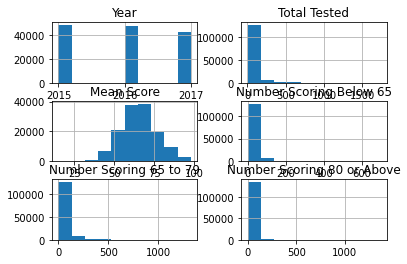

In [20]:
df.hist()

I then did a df['Year'].min() and df['Year].max to get the beginning start year and end year of regents taken. 

Which it was from 2015 to 2016.

In [21]:
df['Year'].min()

2015

In [22]:
df['Year'].max()

2017

I did a df.groupby to find the sum of number scoring below 65, scoring 65 to 79, and scoring 80 or above and the average score for each Regents Exam by Year and By school. 

This gives me a more detail information of how many students scored below 65, 65 to 79, and 80 or above for each regents exam, for each year 2015 to 2017 by each school in the 5 boroughs.  

In [23]:
pd.set_option('display.max_rows', None)
df.groupby(['School DBN', 'Year','Regents Exam']) ['Total Tested', 'Mean Score','Number Scoring Below 65', 'Number Scoring 65 to 79', 'Number Scoring 80 or Above'].sum()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Total Tested  ...  Number Scoring 80 or Above
School DBN Year Regents Exam                                   ...                            
01M034     2015 Living Environment                         70  ...                          32
           2016 Living Environment                         24  ...                           5
01M140     2015 Living Environment                          9  ...                           0
           2016 Living Environment                         25  ...                           8
           2017 Living Environment                         33  ...                           4
01M184     2015 Common Core Algebra                       176  ...                          83
           2016 Common Core Algebra                       175  ...                         118
           2017 Common Core Algebra                       181  ...                         157
                Living Environment                        262  ...                         205
01M188     2015 Common Core Algebra                        81  ...                           0
           2016 Common Core Algebra                        76  ...                           8
                Living Environment                         59  ...                           0
           2017 Common Core Algebra                        64  ...                           3
01M292     2015 Common Core Algebra                        26  ...                           0
                Common Core English                       164  ...                          43
                Common Core Geometry                       10  ...                           0
                English                                   273  ...                          23
                Geometry                                   36  ...                           3
                Global History and Geography              290  ...                          14
                Integrated Algebra                        311  ...                          24
                Living Environment                        362  ...                          10
                Physical Settings/Earth Science            65  ...                           0
                U.S. History and Government               217  ...                          71
           2016 Common Core Algebra                       247  ...                          14
                Common Core Algebra2                       12  ...                           0
                Common Core English                       219  ...                          62
                English                                    58  ...                           0
                Global History and Geography              315  ...                          19
                Integrated Algebra                         14  ...                           0
                Living Environment                        349  ...                           5
                Physical Settings/Earth Science           134  ...                           0
                U.S. History and Government               224  ...                          19
           2017 Common Core Algebra                       256  ...                          27
                Common Core English                       180  ...                          94
                Common Core Geometry                       28  ...                           0
                Global History and Geography              261  ...                          28
                Living Environment                        301  ...                          25
                Physical Settings/Earth Science           175  ...                           4
                U.S. History and Government               185  ...                          66
01M378     2015 Common Core Algebra                         6  ...                           3
           2016 Common Core Algebra                        

I did a df.groupby of total tested and total number scoring Below 65, 65 to 79, and 80 or above for each regents by year. 

I also did 2 graphs. One graphing with all 3 type of scores together and the other graph with all 3 types of scores individually in their own graph. 

I observed the following:

2015 Global History had the most students scoring below 65 with 190,173 students,
while 
Global History and Geography had the most students scoring 65 to 79 with 349,582 students
and 
U.S. History and Government had the most students scoring 80 or above with 175,769 students. 

2016 Global History and Geography had the most students scoring below 65 with 194,121 students,
while 
Common Core Algebra had the most students scoring 65 to 79 with 433,696 students 
and
Common Core English had the most students scoring 80 or above with 197,585 students. 

2017 Common Core Algebra had the most students scoring below 65 with 184,346 students.
while, 
Common Core Algebra had the most students scoring 65 to 79 with 439,759 students 
and 
Common Core English had the most students scoring 80 or above with 216,979 students.  
 

In [24]:
df.groupby(['Regents Exam','Year'])['Total Tested', 'Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Tested  ...  Number Scoring 80 or Above
Regents Exam                    Year                ...                            
Algebra2/Trigonometry           2015        154550  ...                       43635
                                2016        148130  ...                       37868
                                2017         11440  ...                        1119
Common Core Algebra             2015        371487  ...                       23402
                                2016        540207  ...                      106511
                                2017        573065  ...                      133306
Common Core Algebra2            2016        115249  ...                       21274
                                2017        140308  ...                       34106
Common Core English             2015        172902  ...                       72767
                                2016        401403  ...                      197585
                                2017        448519  ...                      216979
Common Core Geometry            2015        180624  ...                       30740
                                2016        220310  ...                       32925
                                2017        275179  ...                       44865
English                         2015        361246  ...                      121972
                                2016         49256  ...                        4580
Geometry                        2015        245168  ...                       61116
                                2016         26694  ...                         982
Global History and Geography    2015        474661  ...                      125079
                                2016        474164  ...                      124565
                                2017        446021  ...                      119165
Integrated Algebra              2015        286221  ...                       36253
                                2016         47936  ...                        5398
Living Environment              2015        447877  ...                      139559
                                2016        446284  ...                      125500
                                2017        456569  ...                      126676
Physical Settings/Chemistry     2015        134057  ...                       32763
                                2016        126189  ...                       32761
                                2017        131245  ...                       35499
Physical Settings/Earth Science 2015        182743  ...                       38667
                                2016        199178  ...                       47872
                                2017        199721  ...                       42860
Physical Settings/Physics       2015         57037  ...                       25909
                                2016         58814  ...                       24244
                                2017         61972  ...                       29287
U.S. History and Government     2015        382482  ...                      175769
                                2016        380651  ...                      173069
                                2017        384812  ...                      164990

[38 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


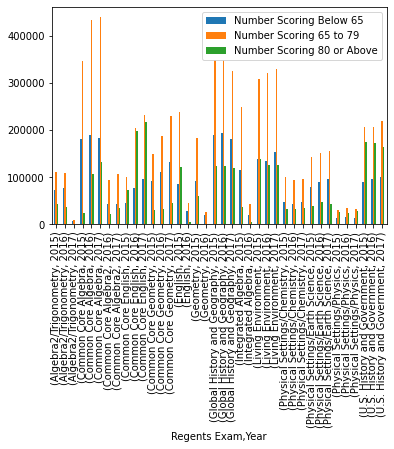

In [25]:
df.groupby(['Regents Exam', 'Year'])['Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].sum().plot(kind='bar')
plt.rcParams["figure.figsize"] = (40,15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


array([[1.42478021e-01, 9.45654357e-01, 2.08810180e-01],
       [5.62332754e-01, 6.85487402e-01, 5.63111917e-01],
       [4.73090632e-01, 5.48186755e-01, 4.34827066e-01],
       [4.53083049e-01, 1.56662133e-01, 3.64610845e-01],
       [6.56975837e-04, 8.82785965e-02, 2.87837351e-01],
       [1.27712557e-02, 9.41863624e-01, 7.98225590e-01],
       [8.91272203e-01, 7.16624672e-01, 7.19807393e-02],
       [9.58881257e-01, 3.25065263e-01, 3.01764819e-01],
       [6.60072544e-01, 6.46397484e-01, 5.83455709e-02],
       [6.48398454e-01, 4.07327999e-01, 9.12562885e-01],
       [4.34690437e-01, 8.59207064e-01, 2.16965244e-01],
       [8.83088143e-02, 4.96872976e-01, 8.01294111e-01],
       [9.66578665e-01, 6.06633647e-01, 4.70526622e-01],
       [6.15444033e-01, 1.30674526e-02, 5.79758792e-01]])

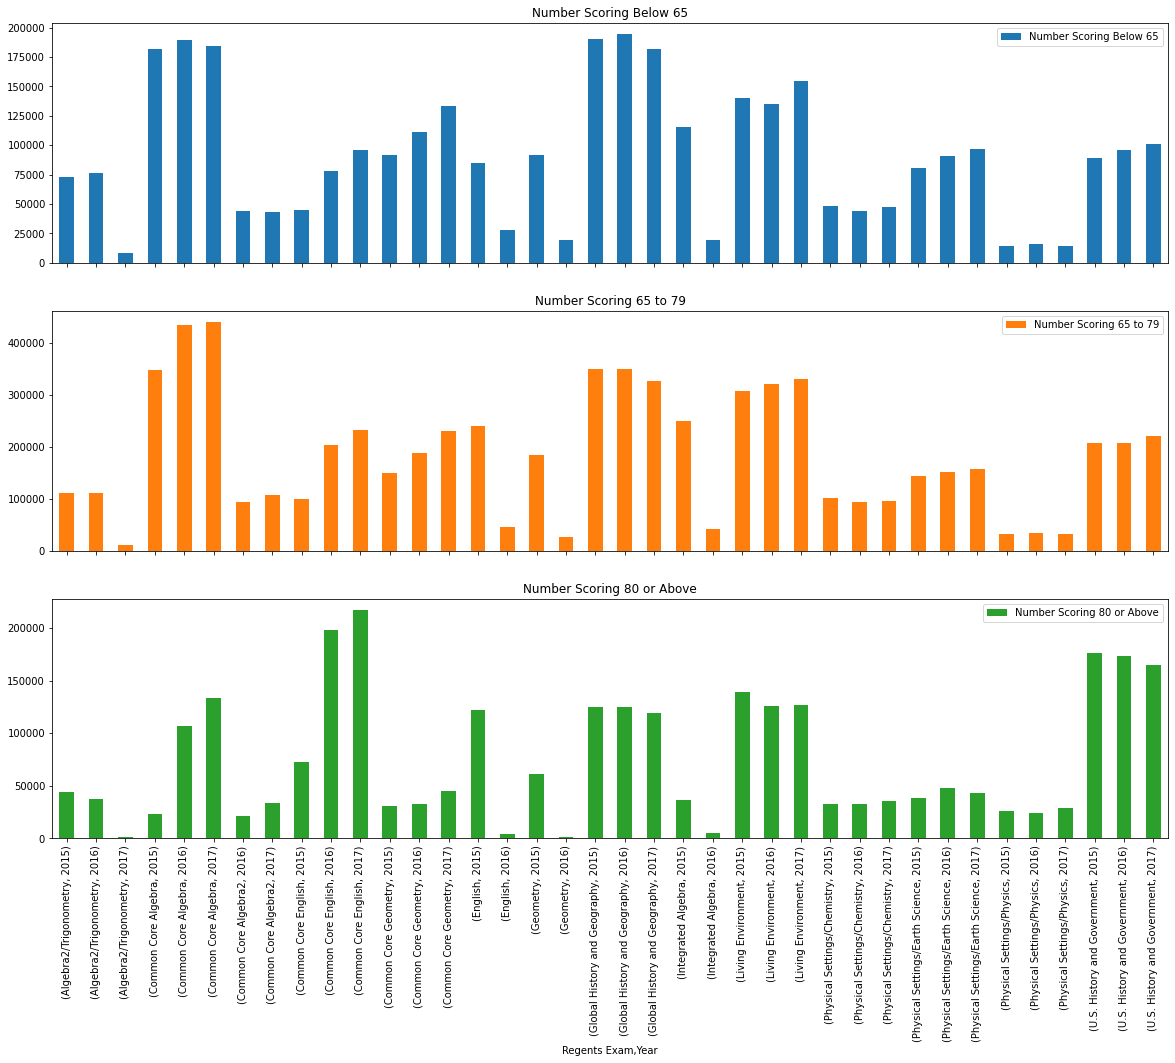

In [26]:
df.groupby(['Regents Exam','Year']) ['Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].sum().plot.bar(subplots=True, figsize=(20, 15))
np.random.rand(14, 3) 

I did a df.groupby average of total number of student tested, number scoring below 65, 65 to 79, and 80 or above by each year 2015, 2016, and 2017.

I also did 2 graphs. One graphing with all 3 type of scores together and the other graph with all 3 types of scores individually in their own graph.

I observed the following:

From 2015 to 2017 more students have taken more Common Core Regents and Earth Science Regents and more students are passing these exams. Keep in mind to pass these exam is a requiremet to graduate with a Regents diploma. 

From 2015 to 2017 less students have taken the more Advanced Regents exams and passing them. Which means there were less students graduating with Advanced Regents Diploma. 

 
 

In [27]:
df.groupby(['Regents Exam','Year'])['Total Tested','Number Scoring Below 65','Number Scoring 65 to 79','Number Scoring 80 or Above'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Tested  ...  Number Scoring 80 or Above
Regents Exam                    Year                ...                            
Algebra2/Trigonometry           2015         64.61  ...                       18.24
                                2016         61.31  ...                       15.67
                                2017         18.33  ...                        1.79
Common Core Algebra             2015         63.29  ...                        3.99
                                2016         81.71  ...                       16.11
                                2017         81.08  ...                       18.86
Common Core Algebra2            2016         59.65  ...                       11.01
                                2017         57.84  ...                       14.06
Common Core English             2015         59.58  ...                       25.07
                                2016         79.82  ...                       39.29
                                2017         83.24  ...                       40.27
Common Core Geometry            2015         66.33  ...                       11.29
                                2016         67.17  ...                       10.04
                                2017         77.67  ...                       12.66
English                         2015         77.91  ...                       26.30
                                2016         22.94  ...                        2.13
Geometry                        2015         73.85  ...                       18.41
                                2016         25.99  ...                        0.96
Global History and Geography    2015         98.46  ...                       25.94
                                2016         95.89  ...                       25.19
                                2017         90.16  ...                       24.09
Integrated Algebra              2015         67.79  ...                        8.59
                                2016         22.98  ...                        2.59
Living Environment              2015         76.21  ...                       23.75
                                2016         74.29  ...                       20.89
                                2017         71.80  ...                       19.92
Physical Settings/Chemistry     2015         63.78  ...                       15.59
                                2016         60.18  ...                       15.62
                                2017         60.73  ...                       16.43
Physical Settings/Earth Science 2015         54.58  ...                       11.55
                                2016         56.79  ...                       13.65
                                2017         56.39  ...                       12.10
Physical Settings/Physics       2015         58.26  ...                       26.46
                                2016         58.35  ...                       24.05
                                2017         61.60  ...                       29.11
U.S. History and Government     2015         80.86  ...                       37.16
                                2016         76.56  ...                       34.81
                                2017         76.20  ...                       32.67

[38 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

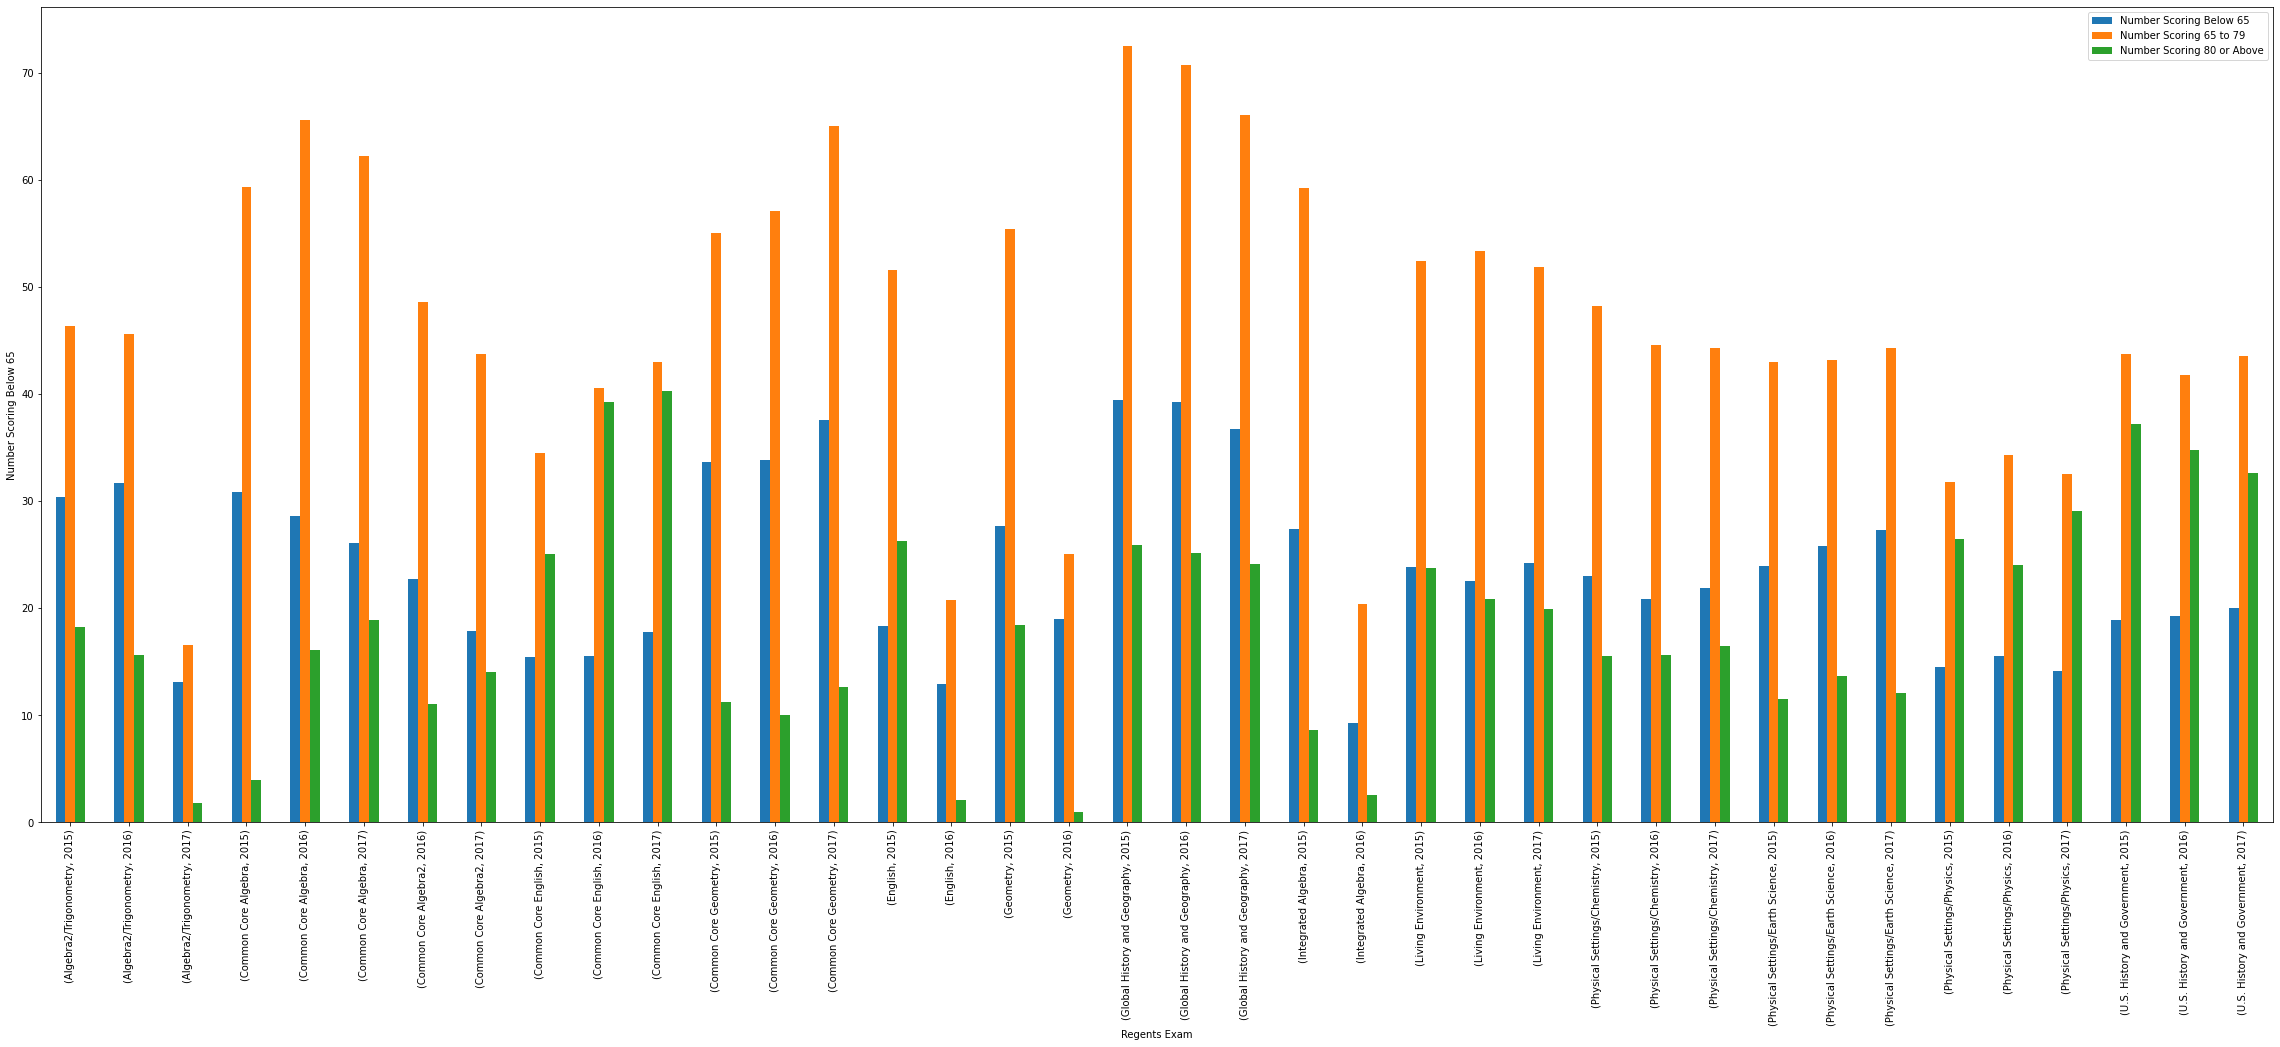

In [28]:
df.groupby(['Regents Exam','Year',])['Number Scoring Below 65','Number Scoring 65 to 79','Number Scoring 80 or Above'].mean().plot.bar()
plt.xlabel('Regents Exam')
plt.ylabel('Number Scoring Below 65')
plt.xticks(rotation=90)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


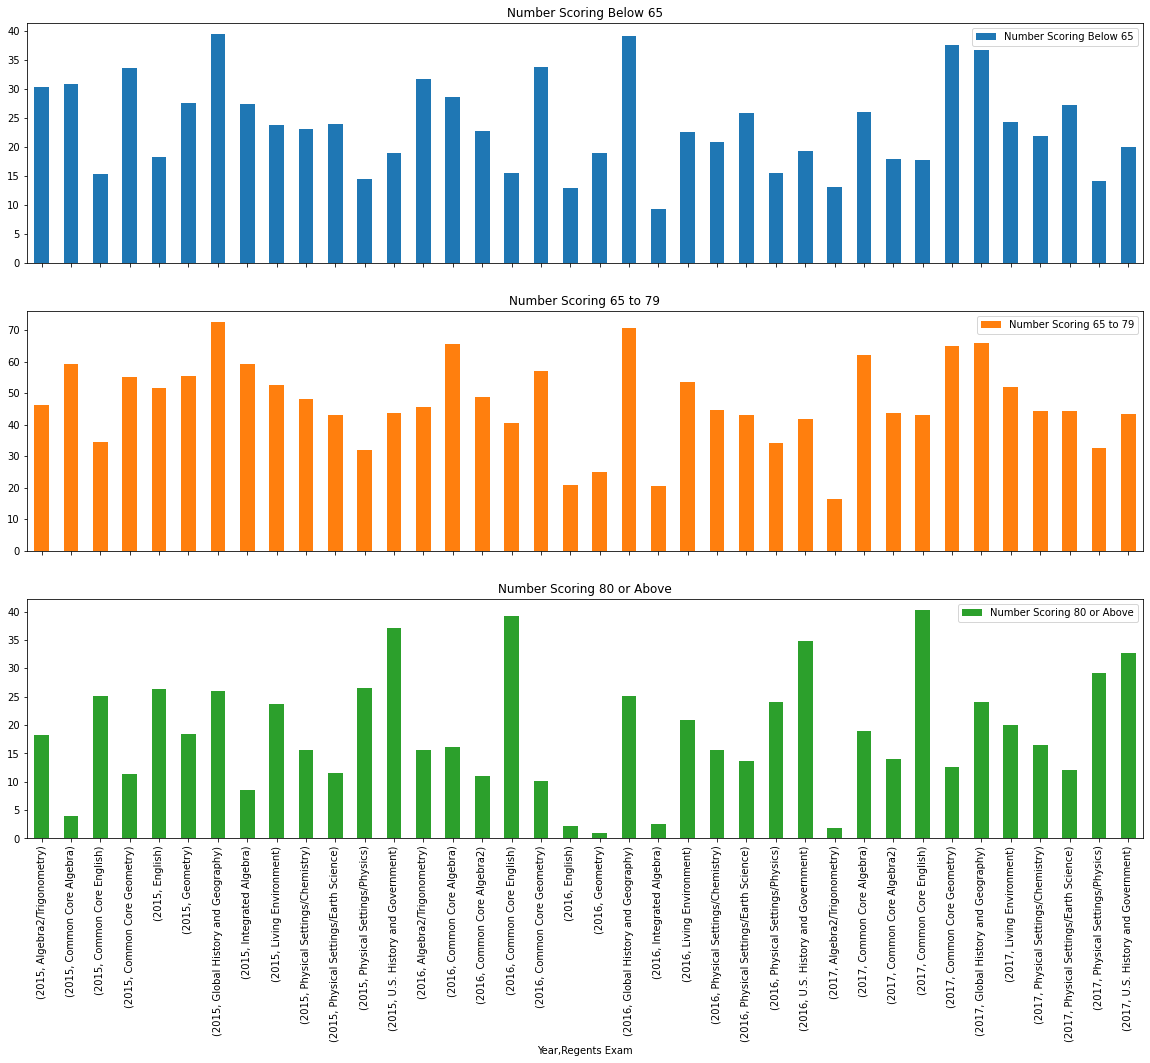

In [29]:
df.groupby(['Year', 'Regents Exam'])['Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].mean().plot.bar(subplots=True, figsize=(20, 15))
np.random.rand(14, 3) 

columns = ["Number Scoring Below 65","Number Scoring 65 to 79", "Number Scoring 80 or Above"]

I did a df.groupby of total number of student tested, number scoring below 65, 65 to 79, and 80 or above by each year 2015, 2016, and 2017.

I observed that all 3 years students scored 65 to 79. 

Even though most students scored 65 to 79, I notice each year students scoring 65 to 79 dropped approximately 224,000 in 2016 and approximately 119,000 in 2017 and the scoring for 80 or above had increased by approximately 10,000 each year and scoring below 65 had decreased approximately 100,000 each year. But also keep in mind that total tested dropped approximately give or take 150,000 each year. 

I also did a graphing. 


In [30]:
df.groupby(['Year'])['Total Tested', 'Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Total Tested  ...  Number Scoring 80 or Above
Year                ...                            
2015       3451055  ...                      927631
2016       3234465  ...                      935134
2017       3128851  ...                      948852

[3 rows x 4 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


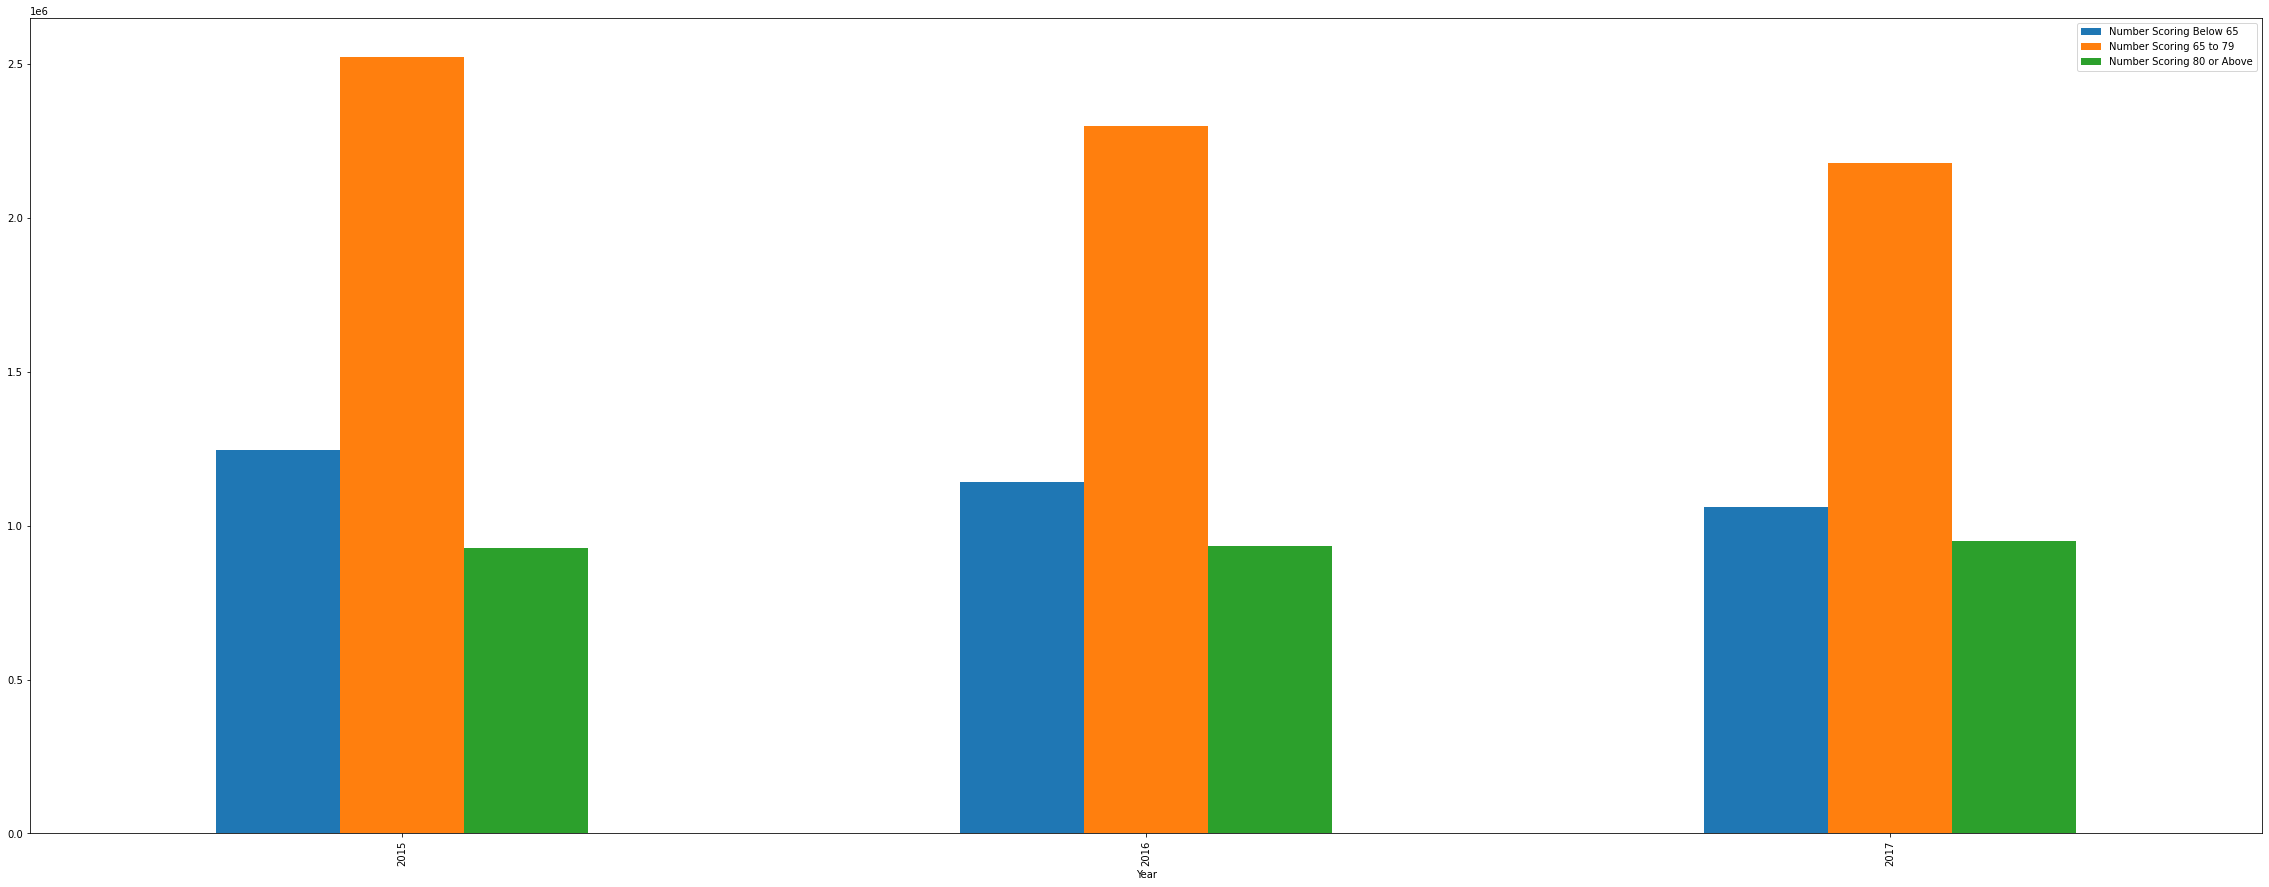

In [31]:
df.groupby(['Year'])['Number Scoring Below 65', 'Number Scoring 65 to 79','Number Scoring 80 or Above'].sum().plot(kind='bar')

I did a sns.barplot. Again, showing a comparison with the average regents scores for each regents by year. U.S. History and Government has the highest average of 75 in 2015, which then dropped to 70 by 2017. The lowest is Algebra 2/Trigonometry with 53 in 2017, which was 57 in 2015.

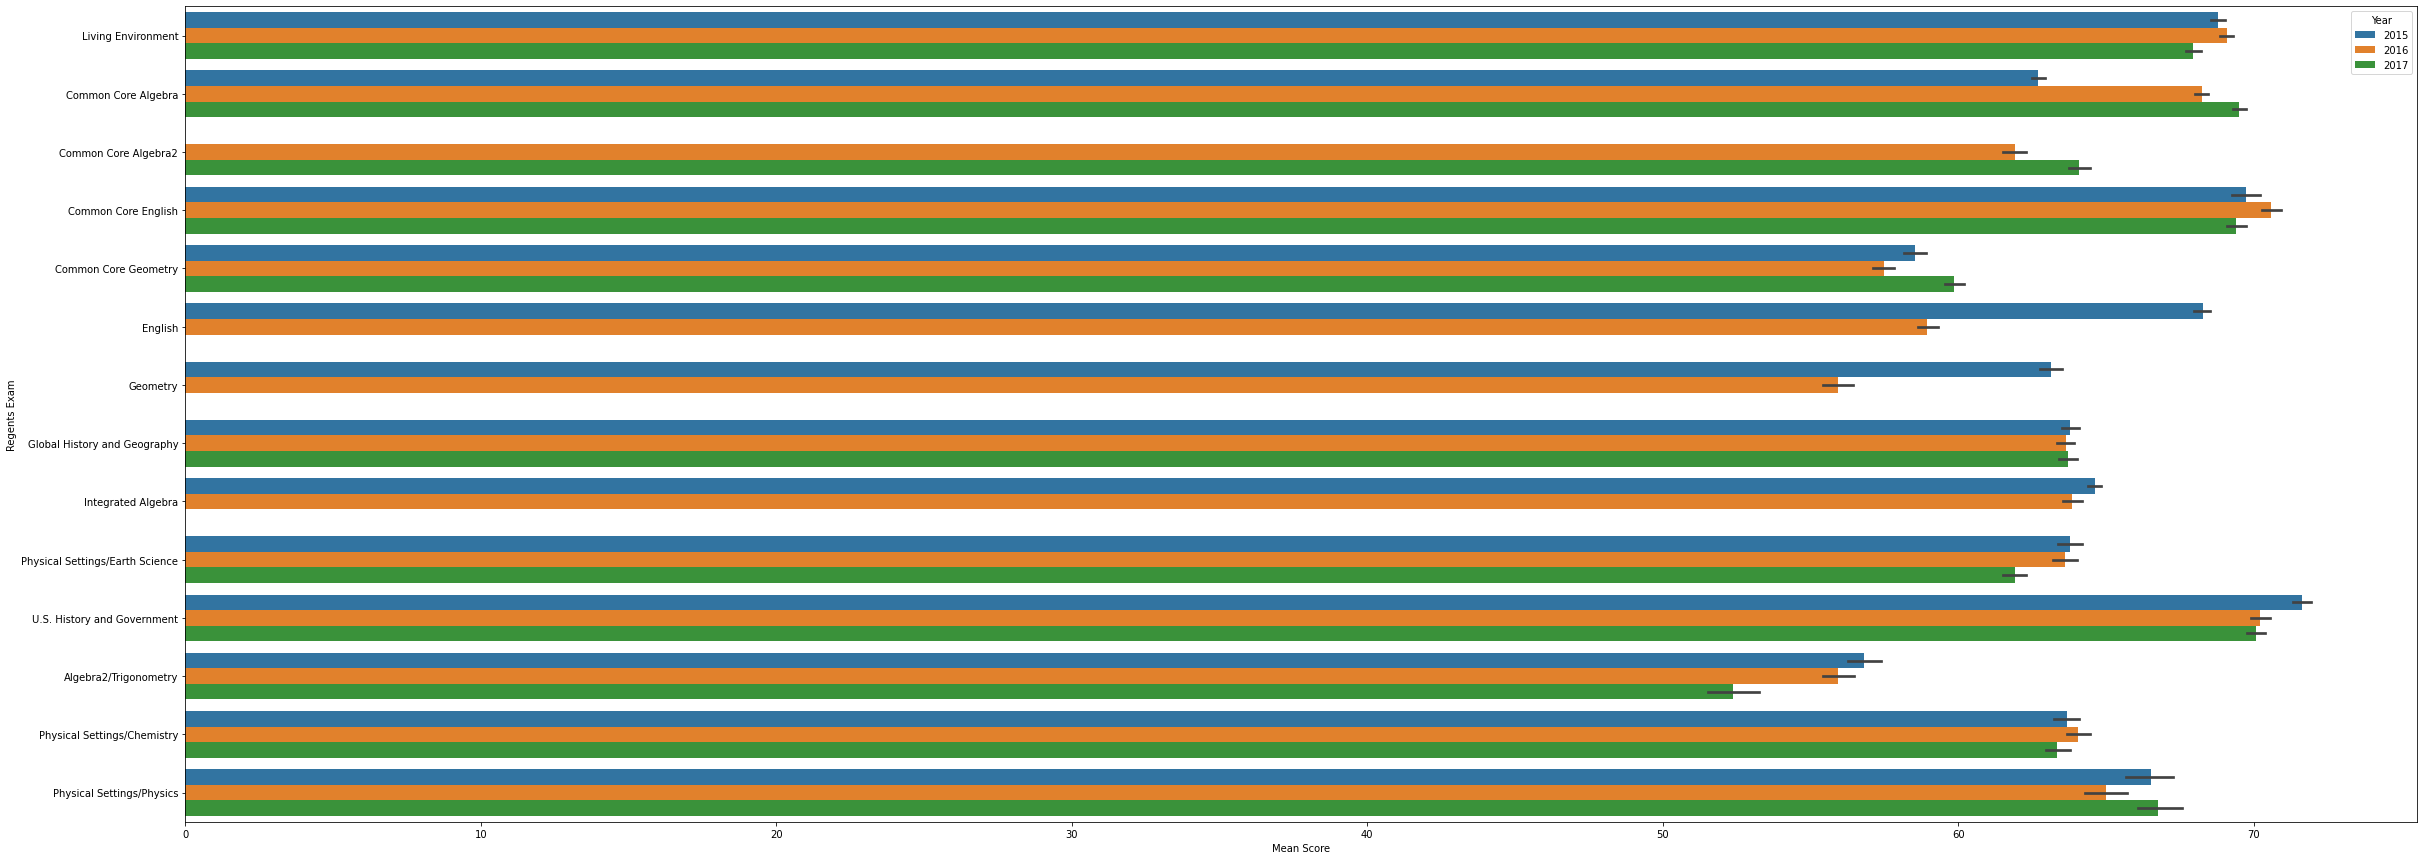

In [32]:
sns.barplot(x='Mean Score', y='Regents Exam', data=df, hue='Year')

I did a sns.boxplot showing a comparison with the average regents scores for each regents. Common Core English and US History and Government has the highest average and the lowest is Algebra 2/Trigonometry.



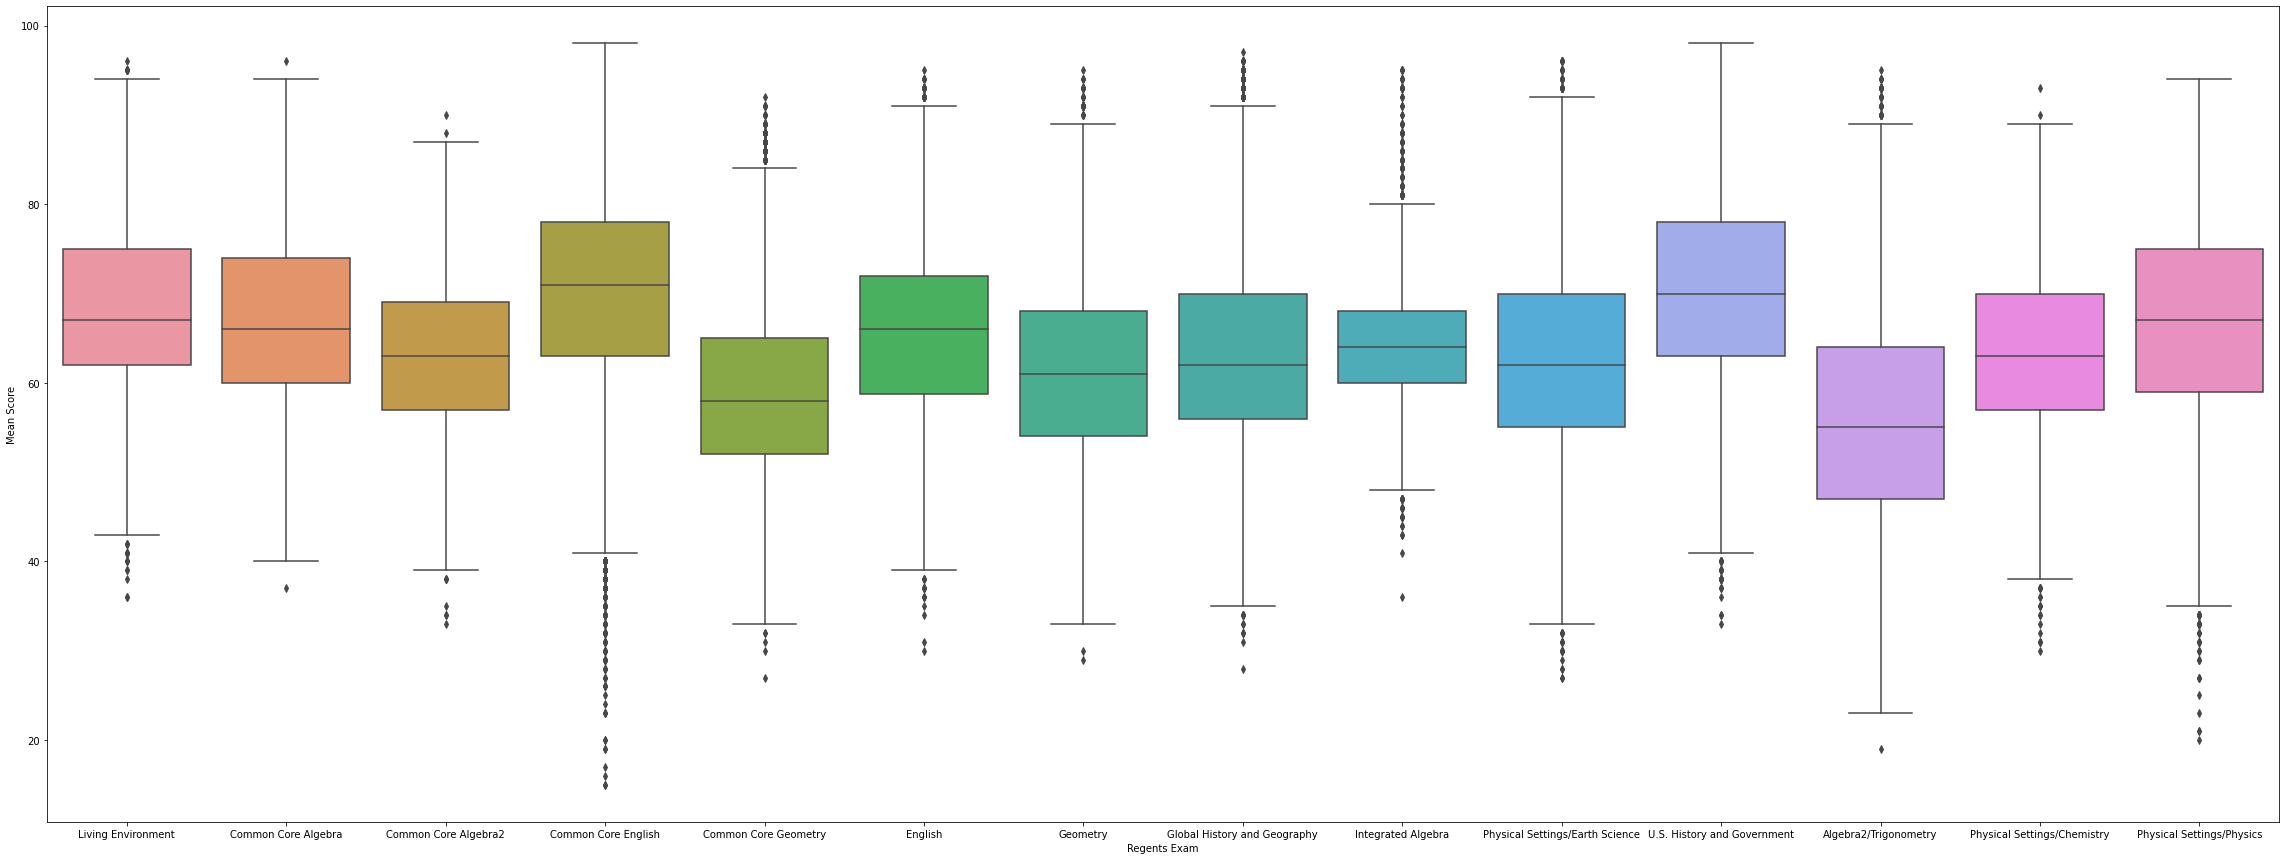

In [33]:
sns.boxplot(x='Regents Exam', y='Mean Score', data=df)

I did a displot graphing of "mean score". 

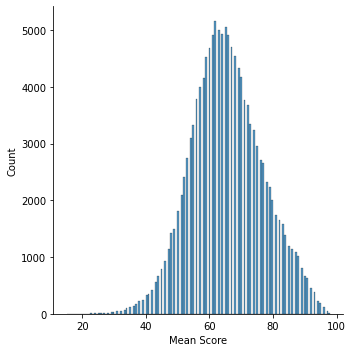

In [34]:
sns.displot(df['Mean Score']) 

**I** did a sns.jointplot graph just to compare the mean score with each regent exam. 

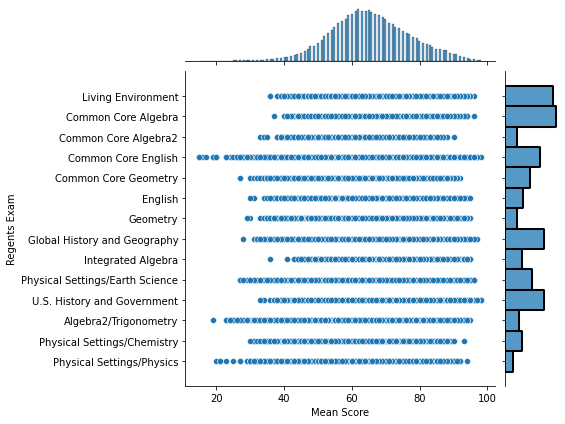

In [35]:
sns.jointplot(x='Mean Score', y='Regents Exam', data = df)

Conclusion

Results of the Regents Exams are used not only for student high school graduation requirements, but for school quality reports, and teacher development and evaluation. Based on the regents results in 2015 to 2017 I observe by looking at the numbers and graphing teachers have been concentrating in getting the students prepared for the basics, like Common Core Algebra, Common Core English, Living Environment, U.S. History and Government, and Global History and Geography, so they could earn their required Regents Diploma as long as they got a 65+.  Advanced regents were left as an optional for those students that wanted to earn an Advanced Regents Diploma. 